# **NetworkX properties**

In [ ]:
import networkx as nx
import matplotlib as plt

G = nx.Graph()

G.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),
				('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),
				('E', 'F'), ('E', 'D'), ('E', 'H'), ('I', 'J')])



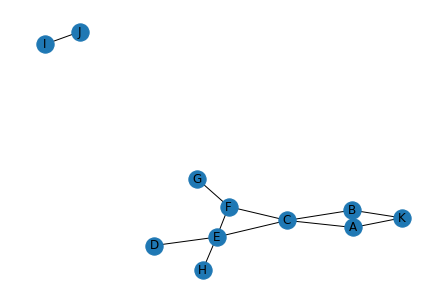

In [ ]:
nx.draw (G, with_labels=True)



**Clustering**


Triadic Closure for a Graph is the tendency for nodes who has a common neighbour to have an edge between them. In case more edges are added in the Graph, these are the edges that tend to get formed. For example in the following Graph : 
The edges that are most likely to be formed next are (B, F), (C, D), (F, H), and (D, H) because these pairs share a common neighbour.



Local Clustering Coefficient of a node in a Graph is the fraction of pairs of the node’s neighbours that are adjacent to each other. For example the node C of the above graph has four adjacent nodes, A, B, E and F. 

Number of possible pairs that can be formed using these 4 nodes are 4*(4-1)/2 = 6. 
Number of actual pairs that are adjacent to each other = 2. These are (A, B) and (E, F). 
Thus Local Clustering Coefficient for node C in the given Graph = 2/6 = 0.667

In [ ]:

# returns a Dictionary with clustering value of each node
print(nx.clustering(G))

# This returns clustering value of specified node
print(nx.clustering(G, 'C'))


{'A': 0.6666666666666666, 'B': 0.6666666666666666, 'K': 1.0, 'C': 0.3333333333333333, 'F': 0.3333333333333333, 'G': 0, 'E': 0.16666666666666666, 'D': 0, 'H': 0, 'I': 0, 'J': 0}
0.3333333333333333


**How to get the Clustering value for the whole Graph ?**


There are two separate ways for finding that out :

1. We can average over all the Local Clustering Coefficient of individual nodes, that is sum of local clustering coefficient of all nodes divided by total number of nodes. 
nx.average_clustering(G) is the code for finding that out. In the Graph given above, this returns a value of 0.28787878787878785. 

2. We can measure Transitivity of the Graph. 

Transitivity of a Graph = 3 * Number of triangles in a Graph / Number of connected triads in the Graph.


In other words, it is thrice the ratio of number of closed triads to number of open triads.


Open triad:

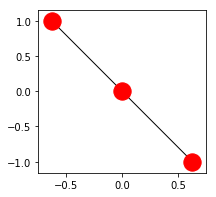




Closed triad:

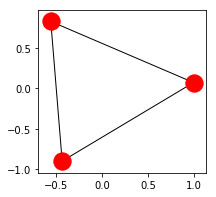



In [ ]:
nx.average_clustering(G)

0.28787878787878785

In [ ]:
nx.transitivity(G)

0.4090909090909091

nx.transitivity(G) is the code for getting the Transitivity. In the Graph given above, it returns a value of 0.4090909090909091. 

Now, we know that the graph given above is not connected. Networkx provides a number of in-built functions to check on the various Connectivity features of a Graph. 
They are better illustrated in the following code:  

False
2
[{'C', 'H', 'G', 'A', 'B', 'K', 'D', 'E', 'F'}, {'J', 'I'}]
{'J', 'I'}
0
0


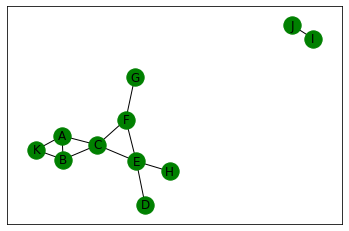

In [ ]:
import networkx as nx

G = nx.Graph()

G.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),
				('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),
				('E', 'F'), ('E', 'D'), ('E', 'H'), ('I', 'J')])

nx.draw_networkx(G, with_labels = True, node_color ='green')

# returns True or False whether Graph is connected
print(nx.is_connected(G))

# returns number of different connected components
print(nx.number_connected_components(G))

# returns list of nodes in different connected components
print(list(nx.connected_components(G)))

# returns list of nodes of component containing given node
print(nx.node_connected_component(G, 'I'))

# returns number of nodes to be removed
# so that Graph becomes disconnected
print(nx.node_connectivity(G))

# returns number of edges to be removed
# so that Graph becomes disconnected
print(nx.edge_connectivity(G))


**NetworkX clustering**


https://networkx.org/documentation/stable/reference/algorithms/clustering.html

**Path**

{'A': ['A'], 'B': ['A', 'B'], 'K': ['A', 'K'], 'C': ['A', 'C'], 'F': ['A', 'C', 'F'], 'E': ['A', 'C', 'E'], 'G': ['A', 'C', 'F', 'G'], 'D': ['A', 'C', 'E', 'D'], 'H': ['A', 'C', 'E', 'H'], 'I': ['A', 'C', 'E', 'H', 'I'], 'J': ['A', 'C', 'E', 'H', 'I', 'J']}
['A', 'C', 'F', 'G']
3
[['A', 'B', 'C', 'F', 'E', 'H', 'I', 'J'], ['A', 'B', 'C', 'E', 'H', 'I', 'J'], ['A', 'K', 'B', 'C', 'F', 'E', 'H', 'I', 'J'], ['A', 'K', 'B', 'C', 'E', 'H', 'I', 'J'], ['A', 'C', 'F', 'E', 'H', 'I', 'J'], ['A', 'C', 'E', 'H', 'I', 'J']]
2.6363636363636362


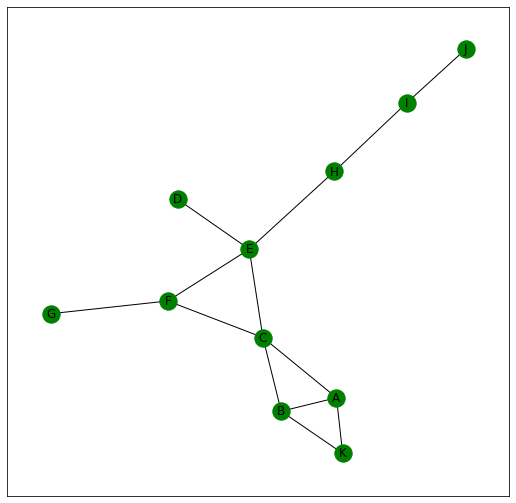

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),
				('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),
				('E', 'F'), ('E', 'D'), ('E', 'H'), ('H', 'I'), ('I', 'J')])

plt.figure(figsize =(9, 9))
nx.draw_networkx(G, with_labels = True, node_color ='green')

print(nx.shortest_path(G, 'A'))
# returns dictionary of shortest paths from A to all other nodes

print(nx.shortest_path(G, 'A', 'G'))
# returns a shortest path from node A to G

print(nx.shortest_path_length(G, 'A', 'G'))
# returns length of shortest path from node A to G

print(list(nx.all_simple_paths(G, 'A', 'J')))
# returns list of all paths from node A to J

print(nx.average_shortest_path_length(G))
# returns average of shortest paths between all possible pairs of nodes


**Few important characteristics of a Graph –**



***Eccentricity: ***

For a node n in graph G, the eccentricity of n is the largest possible shortest path distance between n and all other nodes.

***Diameter : ***

The maximum shortest distance between a pair of nodes in a graph G is its Diameter. It is the largest possible eccentricity value of a node.

***Radius :***

It is the minimum eccentricity value of a node.

**Periphery :** It is the set of nodes that have their eccentricity equal to their Diameter.

***Center : ***

Center of a Graph is the set of nodes whose eccentricity is equal to the radius of the Graph.

Networkx offers built-in function for computing all these properties.  

Eccentricity:  {'A': 5, 'B': 5, 'K': 6, 'C': 4, 'F': 4, 'G': 5, 'E': 3, 'D': 4, 'H': 4, 'I': 5, 'J': 6}
Diameter:  6
Radius:  3
Preiphery:  ['K', 'J']
Center:  ['E']


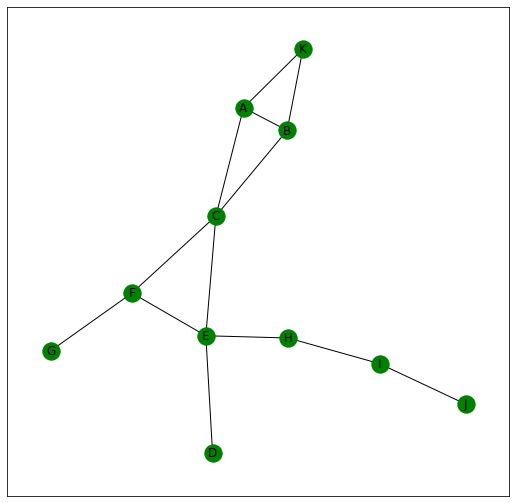

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),
				('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),
				('E', 'F'), ('E', 'D'), ('E', 'H'), ('H', 'I'), ('I', 'J')])

plt.figure(figsize =(9, 9))
nx.draw_networkx(G, with_labels = True, node_color ='green')

print("Eccentricity: ", nx.eccentricity(G))
print("Diameter: ", nx.diameter(G))
print("Radius: ", nx.radius(G))
print("Preiphery: ", list(nx.periphery(G)))
print("Center: ", list(nx.center(G)))


**Shortest path algos**


https://www.tutorialspoint.com/shortest-path-algorithm-in-computer-network

**Dijkstras Algo**


https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/

**MST**

In [ ]:
G4 = nx.Graph()
list_edges = [(1,2,2.0) , (1,4,4.0) , (2,3,3.0) , (2,5,2.0) , (3,6,1.0) , (4,5,2.0) , (4,7,6.0) , (5,6,5.0) , (5,8,3.0) , (6,9,8.0) , (8,9,1.0) , (7,8,2.0)]
G4.add_weighted_edges_from(list_edges)
G4.nodes[1]['pos'] = (0,0)
G4.nodes[2]['pos'] = (0,2)
G4.nodes[3]['pos'] = (0,4)
G4.nodes[4]['pos'] = (2,0)
G4.nodes[5]['pos'] = (2,2)
G4.nodes[6]['pos'] = (2,4)
G4.nodes[7]['pos'] = (4,0)
G4.nodes[8]['pos'] = (4,2)
G4.nodes[9]['pos'] = (4,4)
T = nx.minimum_spanning_tree(G4)
print(T.edges())

[(1, 2), (2, 5), (2, 3), (4, 5), (3, 6), (5, 8), (7, 8), (8, 9)]


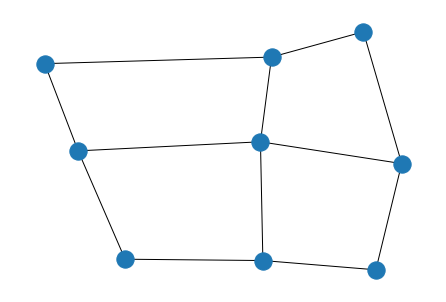

In [ ]:
nx.draw(G4)
plt.show()

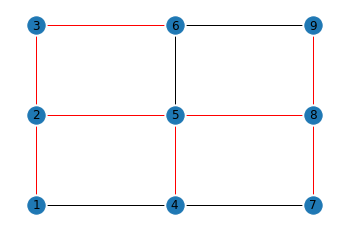

In [ ]:
node_pos=nx.get_node_attributes(G4,'pos')
edge_weight=nx.get_edge_attributes(G4,'weight')
red_edges = T.edges()
node_col = ['white']
# If the edge is in the shortest path set it to red, else set it to white color
edge_col = ['black' if not edge in red_edges else 'red' for edge in G4.edges()]
# Draw the nodes
nx.draw_networkx(G4, node_pos,node_color= node_col, node_size=450)
# Draw the node labels
# nx.draw_networkx_labels(G4, node_pos,node_color= node_col)
# Draw the edges
nx.draw_networkx_edges(G4, node_pos,edge_color= edge_col)
# Draw the edge labels
nx.draw(G4, node_pos,edge_color= edge_col)
# Remove the axis
plt.axis('off')
# Show the plot
plt.show()
G4.clear()

**Dijkstras **

In [ ]:
# The following line initializes two empty directed graph objects
G1=nx.DiGraph()
G2=nx.DiGraph()

NameError: ignored

In [ ]:
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)
G1.add_node(4)
G1.add_node(5)
G1.add_node(6)
G1.nodes()

In [ ]:
list_nodes = [1, 2, 3, 4, 5, 6]
G2.add_nodes_from(list_nodes)
G2.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [ ]:
G1.add_edge(1, 2, weight = 2.0)
G1.add_edge(1,3, weight = 4.0)
G1.add_edge(2, 3, weight = 1.0)
G1.add_edge(2, 4, weight = 4.0)
G1.add_edge(2, 5, weight = 2.0)
G1.add_edge(3, 5, weight = 3.0)
G1.add_edge(4, 6, weight = 2.0)
G1.add_edge(5, 4, weight = 3.0)
G1.add_edge(5, 6, weight = 2.0)
G1.edges()

OutEdgeView([(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 6), (5, 4), (5, 6)])

In [ ]:
list_arcs = [(1,2,2.0) , (1,3,4.0) , (2,3,1.0) , (2,4,4.0) , (2,5,2.0) , (3,5,3.0) , (4,6,2.0) , (5,4,3.0) , (5,6,2.0)]
G2.add_weighted_edges_from(list_arcs)
G2.edges()

In [ ]:
sp = nx.dijkstra_path(G1,source = 1, target = 6)
print(sp)

[1, 2, 5, 6]


In [ ]:
# First we import the matplotlib python plotting package
import matplotlib.pyplot as plt
# We then set the coordinates of each node
G1.nodes[1]['pos'] = (0,0)
G1.nodes[2]['pos'] = (2,2)
G1.nodes[3]['pos'] = (2,-2)
G1.nodes[4]['pos'] = (5,2)
G1.nodes[5]['pos'] = (5,-2)
G1.nodes[6]['pos'] = (7,0)
# The positions of each node are stored in a dictionary
node_pos=nx.get_node_attributes(G1,'pos')
# The edge weights of each arcs are stored in a dictionary
arc_weight=nx.get_edge_attributes(G1,'weight')
# Create a list of arcs in the shortest path using the zip command and store it in red edges
red_edges = list(zip(sp,sp[1:]))
# If the node is in the shortest path, set it to red, else set it to white color
node_col = ['white' if not node in sp else 'red' for node in G1.nodes()]
# If the edge is in the shortest path set it to red, else set it to white color
edge_col = ['black' if not edge in red_edges else 'red' for edge in G1.edges()]
# Draw the nodes
nx.draw_networkx(G1, node_pos,node_color= node_col, node_size=450)
# Draw the node labels
# nx.draw_networkx_labels(G1, node_pos,node_color= node_col)
# Draw the edges
nx.draw_networkx_edges(G1, node_pos,edge_color= edge_col)
# Draw the edge labels
nx.draw(G1, node_pos, edge_color= edge_col)
# Remove the axis
plt.axis('off')
# Show the plot
plt.show()